### Solving Linear regression using Cholesky Decomposition

A linear regression problem takes the form of 


$ Ax = b $

We can solve for x such that

$ A^{T}Ax = bA^{T}$

$ x = (A^{T}A)^{-1}A^{T}b $

This can be computational expensive to calculate over large matrices.

Instead, we can use cholesky's decomposition to solve. Cholesky's decomposition allows us to
decompose A into lower and upper triangular matrices.

$Ax = b $

$ LL'x = b $

Using substitution, we can solve

$ Ly = b $

$ L'x = y $

to arrive at x



('Slope: 0.9623 ', 'Y int: 0.2503')


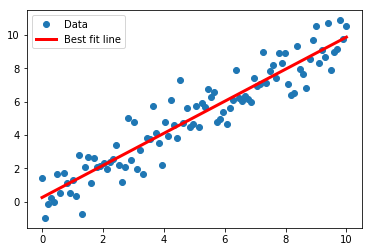

In [58]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)

A = tf.constant(np.column_stack((np.transpose(np.matrix(x_vals)), np.transpose(np.matrix(np.repeat(1,100))))))
b = tf.constant(np.transpose(np.matrix(y_vals)))

tA_A = tf.matmul(tf.transpose(A), A)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A), b)

sol1 = tf.matrix_solve(L, tA_b)
sol2 = tf.matrix_solve(tf.transpose(L), sol1)


with tf.Session() as session:
    s2 = session.run(sol2)
    slope = s2[0][0]
    y_int = s2[1][0]
    
    print('Slope: %0.4f ' % slope, 'Y int: %0.4f' % y_int)
    


best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_int)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',
linewidth=3)
plt.legend(loc='upper left')
plt.show()

## What we did

Using cholesky's decomposition, we found a line of best fit for our points. This decomposition is numerically stable and more efficient.

<img src="https://media.giphy.com/media/k1SuVPEuA89S8/giphy.gif"/>

## The Tensorflow Way

In the next section, we'll compute linear regression using tensorflows api rather than numpy calculations.


('Epoch 19 ', 'Loss 1.409213')
('Epoch 39 ', 'Loss 0.134547')
('Epoch 59 ', 'Loss 0.873369')
('Epoch 79 ', 'Loss 1.224619')
('Epoch 99 ', 'Loss 1.082709')
('Slope: 1.0229 ', 'Y int: -0.0860')


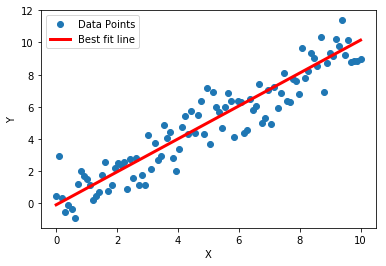

In [59]:
batch_size = 5
learning_rate = 0.01
epochs = 100

tf.reset_default_graph()

input_x = np.linspace(0, 10, 100)
input_y = input_x + np.random.normal(0, 1, 100)

x = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)

W = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

y_pred = tf.add(tf.matmul(x,W), b)
loss = tf.reduce_mean(tf.square(y - y_pred))

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        random_idx = np.random.choice(len(input_x), size=batch_size)
        rand_x = np.transpose([input_x[random_idx]])
        rand_y = np.transpose([input_y[random_idx]])
        
        sess.run(train_step, feed_dict={x: rand_x, y: rand_y})
        cost = sess.run(loss, feed_dict={x: rand_x, y: rand_y})
        
        if (epoch + 1) % 20 == 0:
            print('Epoch %d ' % epoch, 'Loss %f' % cost )
            
    [slope] = sess.run(W)
    [y_intercept] = sess.run(b)
    
    print('Slope: %0.4f ' % slope, 'Y int: %0.4f' % y_intercept)
    best_fit = []
    for i in input_x:
        best_fit.append(slope*i+y_intercept)
        
    plt.plot(input_x, input_y, 'o', label='Data Points')
    plt.plot(input_x, best_fit, 'r-', label='Best fit line',
    linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    

## What Did We Do?

In the above, we calculated a line of best fit using gradient descent. While this line does fit well, gradient descent does not guarantee it is the best fitting line. Gradient descent can be thought of as descending down a hill in the steepest direction. Due to this, we can get stuck in a local minimum rather than the global mininum.

You can experiment with observing the loss by playing around with the hyperparameters (learning_rate, batch_size)

<img src="https://media.giphy.com/media/ZjsCVZX5l1K1y/giphy.gif"/>

